# Pymaceuticals Inc.
---

### Analysis

- The analysis suggests that **Capomulin and Ramicane** are the most promising treatments, with lower average tumor volumes and a consistent reduction in tumor size over time. However, further testing and statistical validation are necessary to confirm these findings. 
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_combined_data = pd.merge(study_results,mouse_metadata, on='Mouse ID')

# Display the data table for preview
#print("Mouse Metadata & Study Results:")
print(mouse_study_combined_data.head())

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  


In [4]:
# Checking the number of mice.
mouse_count = len(mouse_study_combined_data['Mouse ID'].unique())
mouse_count

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = mouse_study_combined_data[mouse_study_combined_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

duplicate_mouse_ids = duplicates['Mouse ID'].unique()

print("Duplicate Mouse IDs:")
print(duplicate_mouse_ids)

Duplicate Mouse IDs:
['g989']


In [24]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data = mouse_study_combined_data[mouse_study_combined_data['Mouse ID'].isin(duplicate_mouse_ids)]

print("All data for the duplicate Mouse IDs:")
print(duplicate_data)

All data for the duplicate Mouse IDs:
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989 

In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data = mouse_study_combined_data[~mouse_study_combined_data['Mouse ID'].isin(duplicate_mouse_ids)]

print("Cleaned Mouse Combines DataFrame without Duplicates of Mouse ID:")
print(cleaned_mouse_data)

Cleaned Mouse Combines DataFrame without Duplicates of Mouse ID:
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2    

In [35]:
# Checking the number of mice in the clean DataFrame.
mouse_count_cleaned = len(cleaned_mouse_data['Mouse ID'].unique())
mouse_count_cleaned

248

## Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
grouped_data = cleaned_mouse_data.groupby('Drug Regimen')

mean_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_data['Tumor Volume (mm3)'].var()
stddev_tumor_volume = grouped_data['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_data['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume StdDev': stddev_tumor_volume,
    'Tumor Volume SEM': sem_tumor_volume
}).reset_index()

print("Summary Statistics Table:")
print(summary_stats)

Summary Statistics Table:
  Drug Regimen  Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
0    Capomulin          40.675741            41.557809              24.947764   
1     Ceftamin          52.591172            51.776157              39.290177   
2    Infubinol          52.884795            51.820584              43.128684   
3     Ketapril          55.235638            53.698743              68.553577   
4     Naftisol          54.331565            52.509285              66.173479   
5      Placebo          54.033581            52.288934              61.168083   
6     Propriva          52.320930            50.446266              43.852013   
7     Ramicane          40.216745            40.673236              23.486704   
8     Stelasyn          54.233149            52.431737              59.450562   
9    Zoniferol          53.236507            51.818479              48.533355   

   Tumor Volume StdDev  Tumor Volume SEM  
0             4.994774          0.32934

In [46]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_StdDev='std',
    Tumor_Volume_Std_Err='sem'
).reset_index()

print(summary_stats)

  Drug Regimen  Mean_Tumor_Volume  Median_Tumor_Volume  Tumor_Volume_Variance  \
0    Capomulin          40.675741            41.557809              24.947764   
1     Ceftamin          52.591172            51.776157              39.290177   
2    Infubinol          52.884795            51.820584              43.128684   
3     Ketapril          55.235638            53.698743              68.553577   
4     Naftisol          54.331565            52.509285              66.173479   
5      Placebo          54.033581            52.288934              61.168083   
6     Propriva          52.320930            50.446266              43.852013   
7     Ramicane          40.216745            40.673236              23.486704   
8     Stelasyn          54.233149            52.431737              59.450562   
9    Zoniferol          53.236507            51.818479              48.533355   

   Tumor_Volume_StdDev  Tumor_Volume_Std_Err  
0             4.994774              0.329346  
1             

## Bar and Pie Charts

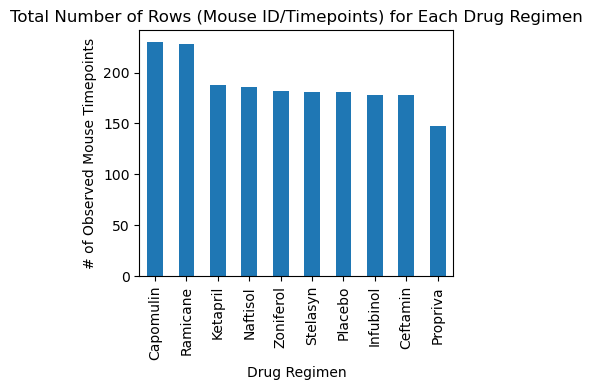

In [55]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_counts = cleaned_mouse_data['Drug Regimen'].value_counts()

drug_chart = drug_counts.plot(kind='bar', figsize =(4,4))                           
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()

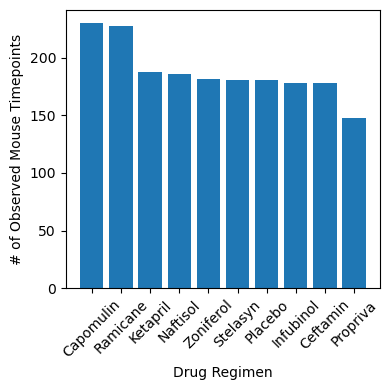

In [61]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = cleaned_mouse_data['Drug Regimen'].value_counts()

plt.figure(figsize=(4,4))
plt.bar(drug_counts.index, drug_counts.values)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

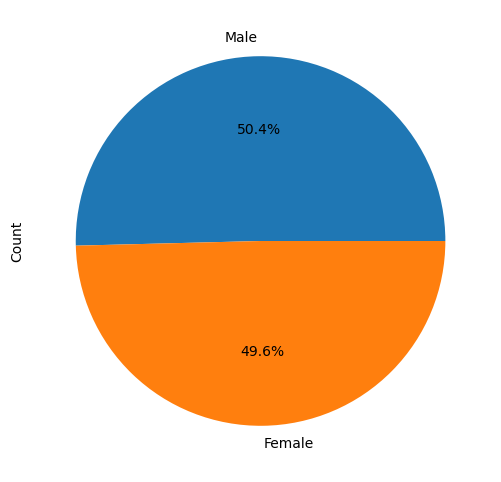

In [65]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = cleaned_mouse_data.drop_duplicates(subset=['Mouse ID'])
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.ylabel('Count')  # Hide the y-label to make the plot cleaner
plt.show()


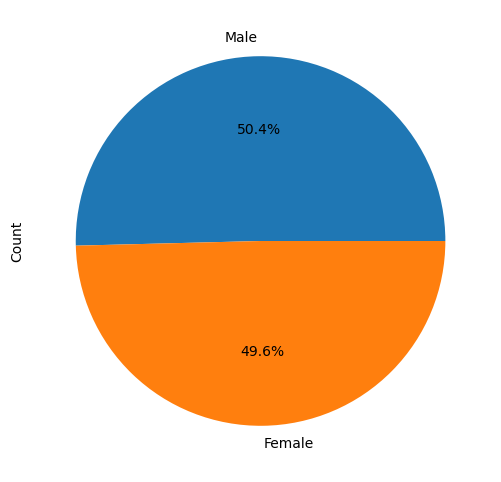

In [70]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = cleaned_mouse_data.drop_duplicates(subset=['Mouse ID'])
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=0)
plt.ylabel('Count')
plt.show()

## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = cleaned_mouse_data[cleaned_mouse_data['Drug Regimen'].isin(treatment_regimens)]
last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(last_timepoints, filtered_data, on=['Mouse ID', 'Timepoint'], how='left')
print(final_tumor_volumes[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']])

   Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
0      a203    Infubinol         45           67.973419
1      a251    Infubinol         45           65.525743
2      a275     Ceftamin         45           62.999356
3      a411     Ramicane         45           38.407618
4      a444     Ramicane         45           43.047543
..      ...          ...        ...                 ...
95     y769     Ceftamin         45           68.594745
96     y793    Capomulin         45           31.896238
97     y865     Ceftamin         45           64.729837
98     z578     Ramicane         45           30.638696
99     z581    Infubinol         45           62.754451

[100 rows x 4 columns]


In [84]:
# Ensure 'Tumor Volume (mm3)' is numeric
final_tumor_volumes['Tumor Volume (mm3)'] = pd.to_numeric(final_tumor_volumes['Tumor Volume (mm3)'], errors='coerce')

# Drop rows with NaN values in 'Tumor Volume (mm3)' after conversion
final_tumor_volumes.dropna(subset=['Tumor Volume (mm3)'], inplace=True)

In [90]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatment_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # add subset
    tumor_vol_data.append(treatment_data)

    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
   
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{treatment} potential outliers: {outliers}")

print(tumor_vol_data)

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
[9     38.982878
12    38.939633
24    30.485985
25    37.074024
26    40.159220
32    47.685963
33    37.311846
34    38.125164
35    38.753265
45    41.483008
49    38.846876
51    28.430964
53    33.329098
64    46.539206
65    32.377357
68    41.581521
70    23.343598
72    40.728578
73    34.455298
78    31.023923
82    40.658124
83    39.952347
88    36.041047
90    28.484033
96    31.896238
Name: Tumor Volume (mm3), dtype: float64, 3     38.407618
4     43.047543
5     38.810366
7     32.978522
16    38.342008
17    33.397653
19    37.311236
21    40.659006
27    29.128472
29    33.562402
30    36.374510
37    31.560470
38    36.134852
40    22.050126

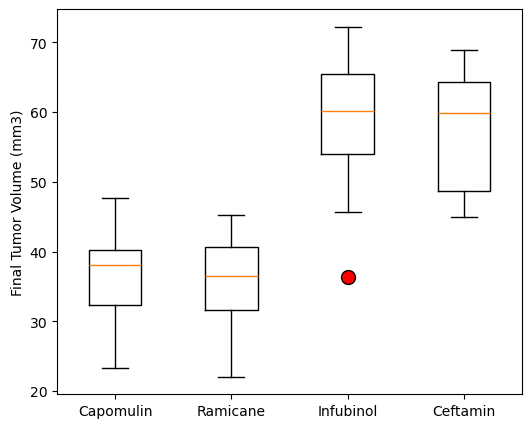

In [113]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(6, 5))
boxplot = plt.boxplot(tumor_vol_data, 
                      showmeans=False, 
                      showcaps=True, 
                      showfliers=True, 
                      flierprops=dict(marker='o', color='red', markerfacecolor = 'red', markersize=10))

plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks(ticks=[1, 2, 3, 4], labels=treatment_regimens)

plt.show()

## Line and Scatter Plots

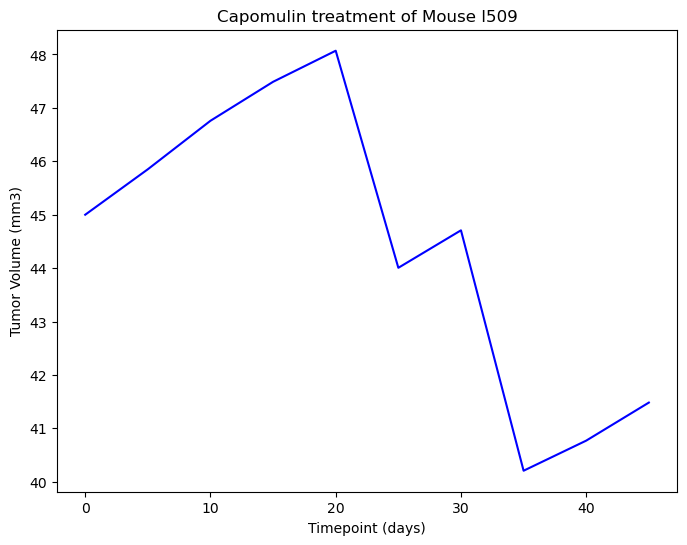

In [123]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data for a single mouse treated with Capomulin
mouse_id = 'l509'
capomulin_data = cleaned_mouse_data[(cleaned_mouse_data['Drug Regimen'] == 'Capomulin') & 
                                     (cleaned_mouse_data['Mouse ID'] == mouse_id)]

# Generate the line plot
plt.figure(figsize=(8, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], linestyle='-', color='b')

# Customize the plot
plt.title(f'Capomulin treatment of Mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

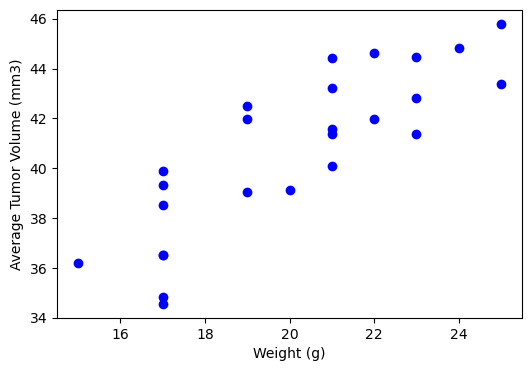

In [126]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_mouse_data[cleaned_mouse_data['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

merged_data = pd.merge(average_tumor_volume, cleaned_mouse_data[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left').drop_duplicates()

plt.figure(figsize=(6, 4))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o', color='blue')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.8419363424694721


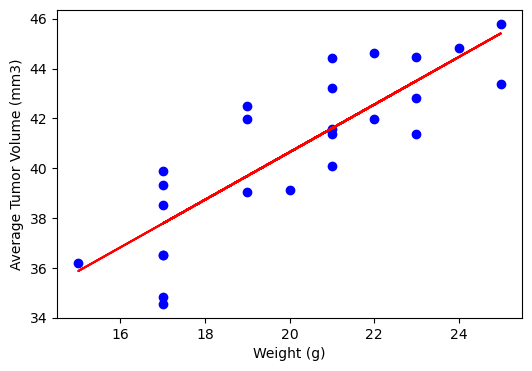

In [133]:
# Calculate the correlation coefficient and a linear regression model
import scipy.stats as stats
correlation_coefficient, _ = stats.pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is: {correlation_coefficient}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.figure(figsize=(6, 4))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o', color='blue', label='Data Points')
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='red', label='Regression Line')

# Customize the plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()